
<img src="../images/house.jpeg" style="float: center; margin: 20px; height: 55px">

## Project 2 - Ames Housing Data and Kaggle Challenge

_Author: Afolabi Cardoso_

---

## Exploratory Data Analysis

---
#### Contents:
[Overview](#Overview) | [Imports](#Imports) | [EDA](#EDA)

---
## Overview

This notebook uses exploratory data anysis techniques to visualize the relationsips between features and SalePrice.

- I start by generating a heat map to show correlation between variables and SalePrice
- I exploring the variables with large number of missing values and checking to see if dropping them will be beneficial
- I explore the numerical variables and select the features with strong correlation with the SalePrice
- Finally I explore the categorical variables and check for colinearity

---
## Imports

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [133]:
df = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

---
## EDA

Get the features with the highest correlation with SalePrice

In [134]:
correlations = df.corr()['SalePrice'].sort_values(ascending = False).index

In [135]:
correlations

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
       'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Lot Frontage',
       'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath',
       'Half Bath', '2nd Flr SF', 'Bsmt Unf SF', 'Bedroom AbvGr',
       'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2',
       'Misc Val', 'Yr Sold', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Id',
       'MS SubClass', 'Overall Cond', 'Kitchen AbvGr', 'Enclosed Porch',
       'PID'],
      dtype='object')

Using the heat map get features with low correlation with SalePrice 

Also check for colinearity amongst features

Inspect the features in groups of 10

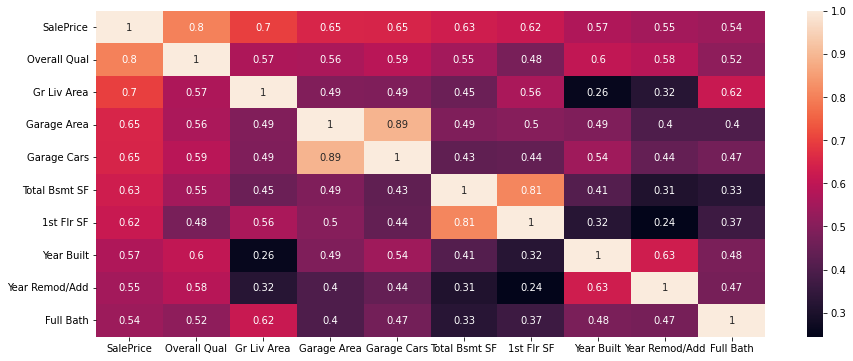

In [136]:
plt.figure(figsize=(15,6))
sns.heatmap(df[correlations[0:10]].corr(),annot=True);

#### Features with high Co-linearity 
- Garage Cars and Garage area have a strong correlation 
- Total Basement SF and 1st Floor SF have a strong correlation
- Year Built and year remolded
- General Living area and full bath
- Overal Quality and Year remolded



/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

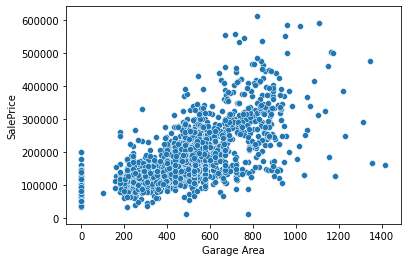

In [137]:
sns.scatterplot(df['Garage Area'], df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

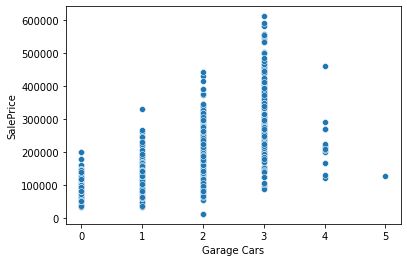

In [138]:
sns.scatterplot(df['Garage Cars'], df['SalePrice'])

In [139]:
def categ_to_num(feature):
    series = df.groupby(feature).mean()['SalePrice']
    mean_dict = {key:value for key,value in zip(series.index,series)} 
    return df[feature].map(lambda x: int(mean_dict.get(x)))

#### MS Subclass

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MS SubClass', ylabel='SalePrice'>

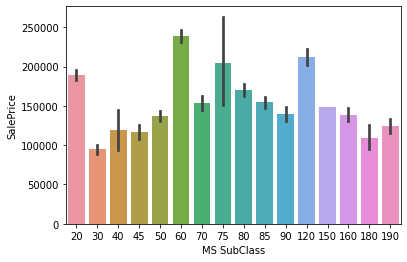

In [140]:
sns.barplot(df['MS SubClass'],df['SalePrice'])

#### Street

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

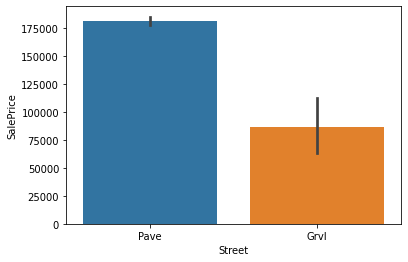

In [141]:
sns.barplot(df['Street'],df['SalePrice'])

#### Lot Shape

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Lot Shape', ylabel='SalePrice'>

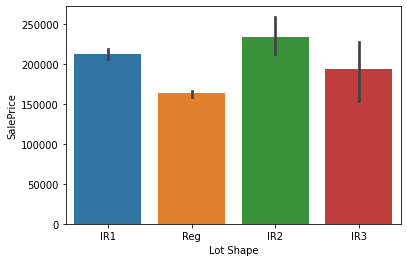

In [142]:
sns.barplot(df['Lot Shape'],df['SalePrice'])

#### Land Contour

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Land Contour', ylabel='SalePrice'>

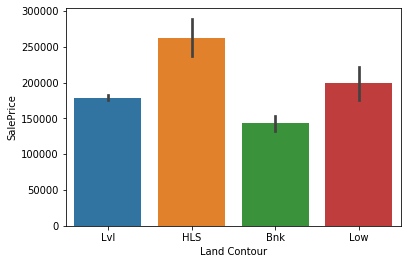

In [143]:
sns.barplot(df['Land Contour'],df['SalePrice'])

#### Utilities

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

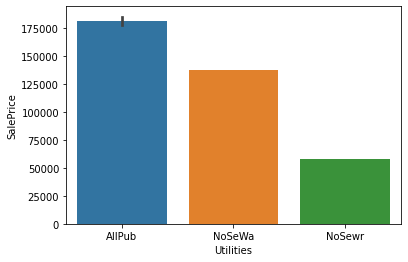

In [144]:
sns.barplot(df['Utilities'],df['SalePrice'])

<AxesSubplot:>

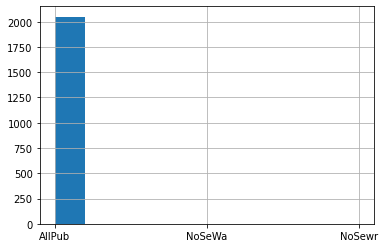

In [145]:
df['Utilities'].hist()

In [146]:
df['Utilities'].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

#### Land Slope

The three classes in land slope are very close together.

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Land Slope', ylabel='SalePrice'>

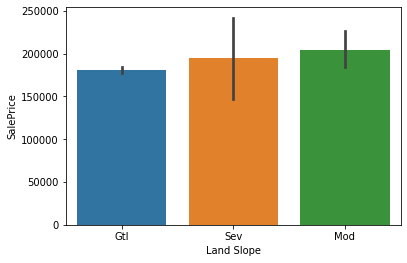

In [147]:
sns.barplot(df['Land Slope'],df['SalePrice'])

#### Land config

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Lot Config', ylabel='SalePrice'>

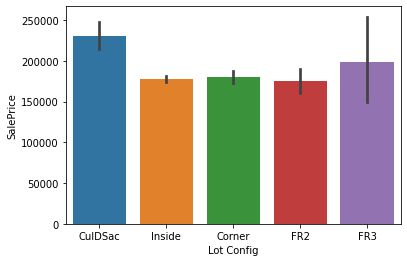

In [148]:
sns.barplot(df['Lot Config'],df['SalePrice'])

<AxesSubplot:>

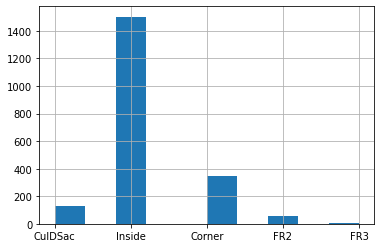

In [149]:
df['Lot Config'].hist()

#### Neighborhood

<BarContainer object of 2051 artists>

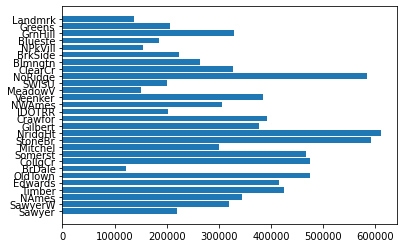

In [150]:
plt.barh(df['Neighborhood'],df['SalePrice'])

#### Condition1 and Condition2

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Condition 1', ylabel='SalePrice'>

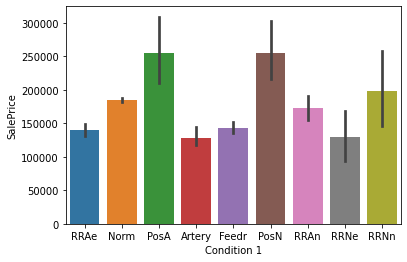

In [151]:
sns.barplot(df['Condition 1'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Condition 2', ylabel='SalePrice'>

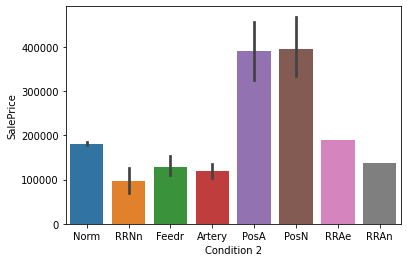

In [152]:
sns.barplot(df['Condition 2'],df['SalePrice'])

#### Building type and House Style

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Bldg Type', ylabel='SalePrice'>

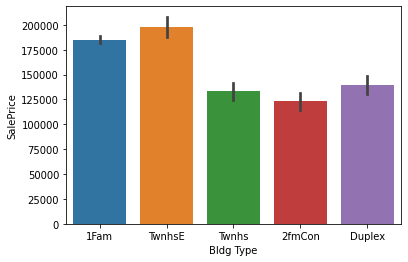

In [153]:
sns.barplot(df['Bldg Type'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='House Style', ylabel='SalePrice'>

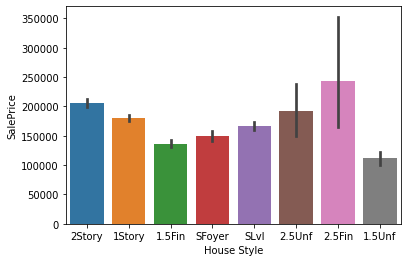

In [154]:
sns.barplot(df['House Style'],df['SalePrice'])

### Overal Qual and Overal Condition

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

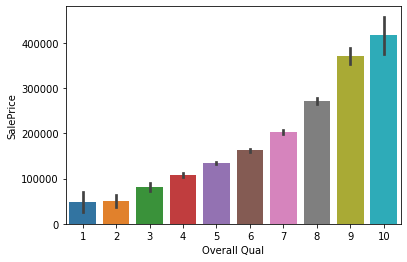

In [155]:
sns.barplot(df['Overall Qual'],df['SalePrice'])

<AxesSubplot:xlabel='Overall Qual', ylabel='Count'>

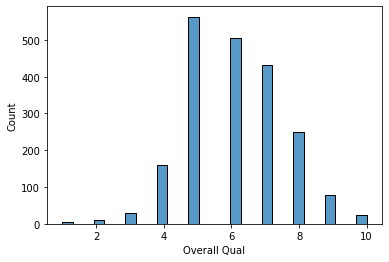

In [156]:
sns.histplot(df['Overall Qual'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Overall Cond', ylabel='SalePrice'>

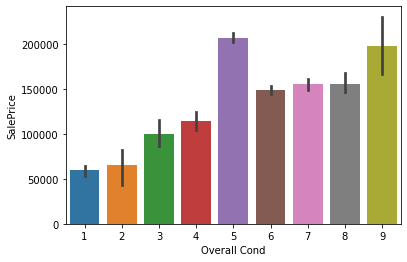

In [157]:
sns.barplot(df['Overall Cond'],df['SalePrice'])

<AxesSubplot:>

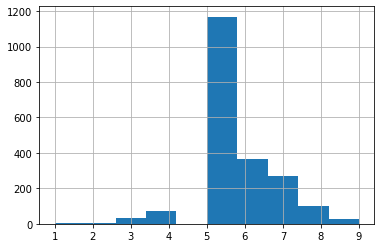

In [158]:
df['Overall Cond'].hist()

### Year Built

In [159]:
df['Year Built'].unique()

array([1976, 1996, 1953, 2006, 1900, 1966, 2005, 1959, 1952, 1969, 1971,
       1880, 1999, 2007, 2004, 1916, 1963, 1977, 2009, 1968, 2000, 1992,
       1955, 1961, 1965, 1937, 1895, 1949, 1981, 1929, 1995, 1958, 1973,
       1994, 1978, 1954, 1935, 1941, 1931, 2003, 1928, 1970, 1951, 1920,
       1930, 1924, 1927, 1960, 1925, 1910, 2008, 1915, 1997, 1956, 1979,
       1964, 2001, 1972, 1957, 1939, 1962, 1947, 1940, 1932, 1967, 1993,
       1875, 1912, 2010, 1987, 1918, 1988, 1922, 1926, 1984, 1942, 1890,
       2002, 1975, 1998, 1936, 1938, 1985, 1923, 1948, 1950, 1980, 1991,
       1917, 1986, 1946, 1885, 1914, 1896, 1983, 1921, 1945, 1901, 1990,
       1974, 1913, 1905, 1982, 1919, 1872, 1892, 1934, 1879, 1893, 1898,
       1911, 1908, 1989])

<AxesSubplot:ylabel='Count'>

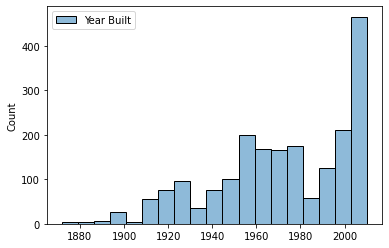

In [160]:
sns.histplot([df['Year Built']])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

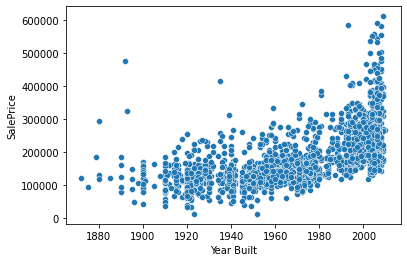

In [161]:
sns.scatterplot(df['Year Built'],df['SalePrice'])

### Year Remod

In [162]:
df['Year Remod/Add'].value_counts()

1950    262
2006    139
2007    123
2005    100
2004     83
       ... 
1952      9
2010      8
1983      7
1981      6
1982      3
Name: Year Remod/Add, Length: 61, dtype: int64

<AxesSubplot:xlabel='Year Remod/Add', ylabel='Count'>

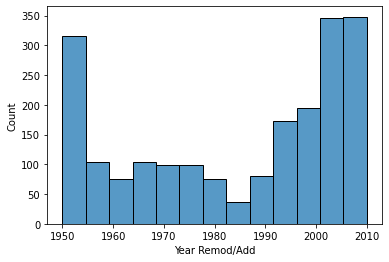

In [163]:
sns.histplot(df['Year Remod/Add'])

#### Roof Style, Roof Matl

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Roof Style', ylabel='SalePrice'>

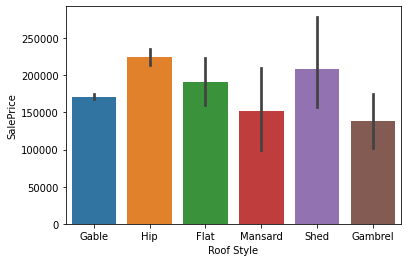

In [164]:
sns.barplot(df['Roof Style'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Roof Matl', ylabel='SalePrice'>

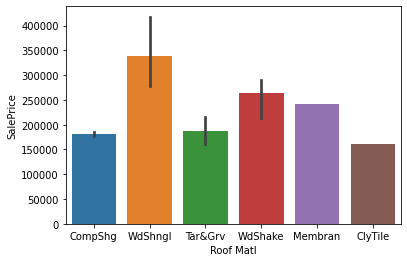

In [165]:
sns.barplot(df['Roof Matl'],df['SalePrice'])

#### Exterior 1st, Exterior 2nd

<BarContainer object of 2051 artists>

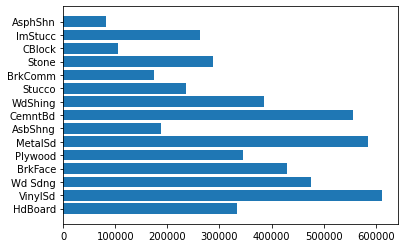

In [166]:
plt.barh(df['Exterior 1st'],df['SalePrice'])

<BarContainer object of 2051 artists>

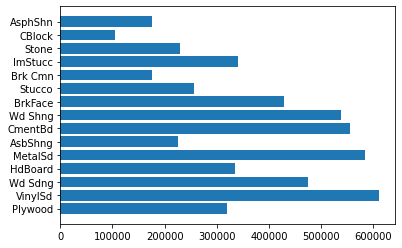

In [167]:
plt.barh(df['Exterior 2nd'],df['SalePrice'])

### 1st Flr Square feet, 2nd Floor Square feet and GrLivArea colinear 

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

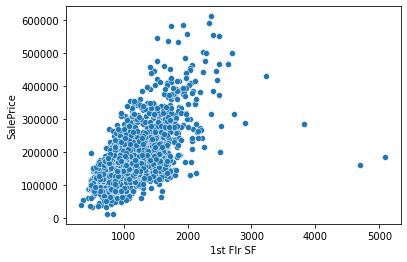

In [168]:
sns.scatterplot(df['1st Flr SF'],df['SalePrice'])

<AxesSubplot:xlabel='1st Flr SF', ylabel='Count'>

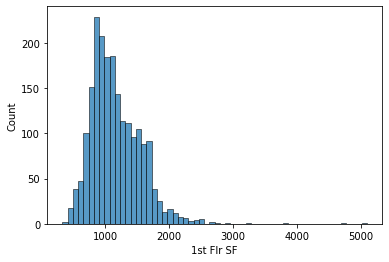

In [169]:
sns.histplot(df['1st Flr SF'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='2nd Flr SF', ylabel='SalePrice'>

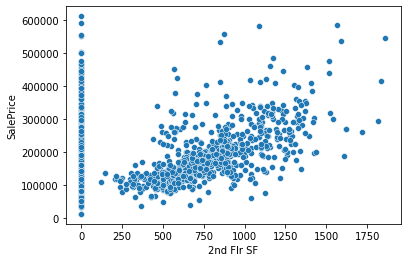

In [170]:
sns.scatterplot(df['2nd Flr SF'],df['SalePrice'])

<AxesSubplot:xlabel='2nd Flr SF', ylabel='Count'>

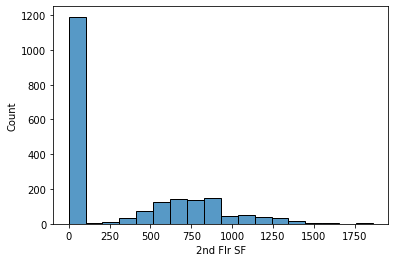

In [171]:
sns.histplot(df['2nd Flr SF'])

### Low Qual Fin SF (dropped) apply log thingy

<AxesSubplot:xlabel='Low Qual Fin SF', ylabel='Count'>

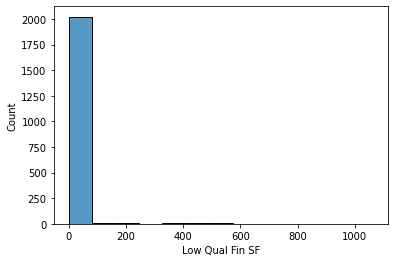

In [172]:
sns.histplot(df['Low Qual Fin SF'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Low Qual Fin SF', ylabel='SalePrice'>

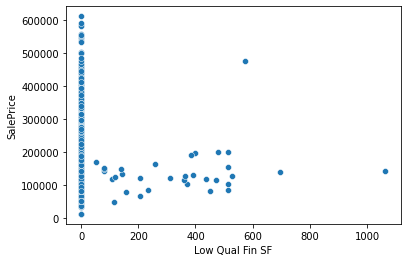

In [173]:
sns.scatterplot(df['Low Qual Fin SF'],df['SalePrice'])

### Gr Liv Area

<AxesSubplot:xlabel='Gr Liv Area', ylabel='Count'>

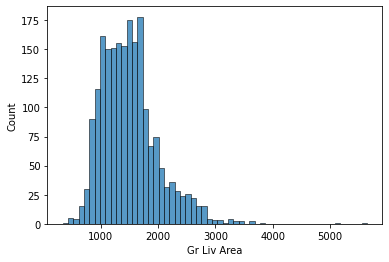

In [174]:
sns.histplot(df['Gr Liv Area'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

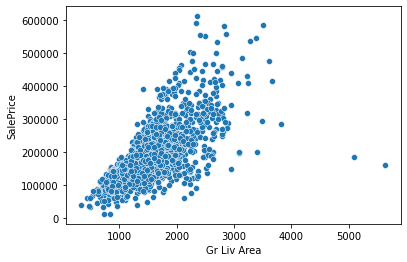

In [175]:
sns.scatterplot(df['Gr Liv Area'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

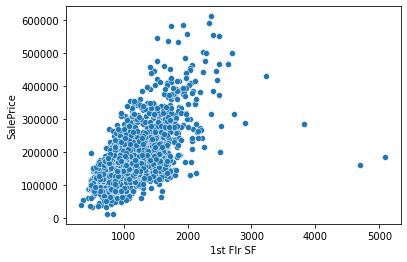

In [176]:
sns.scatterplot(df['1st Flr SF'],df['SalePrice'])

#### Bsmt full bath, bsmt half bath

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Bsmt Full Bath', ylabel='SalePrice'>

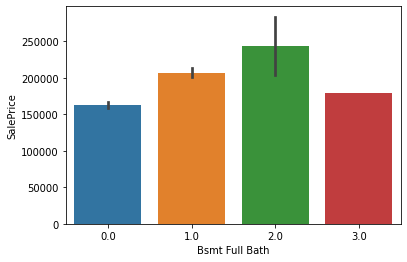

In [177]:
sns.barplot(df['Bsmt Full Bath'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Bsmt Half Bath', ylabel='SalePrice'>

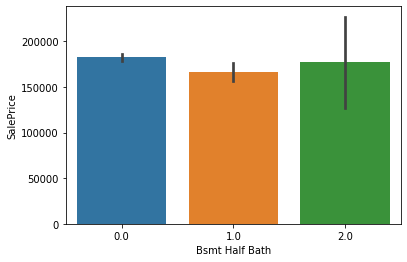

In [178]:
sns.barplot(df['Bsmt Half Bath'],df['SalePrice'])

### Full Bath

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

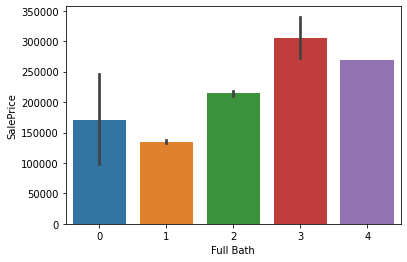

In [179]:
sns.barplot(df['Full Bath'],df['SalePrice'])

#### kitchen Qual, kitchen above grd

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Kitchen Qual', ylabel='SalePrice'>

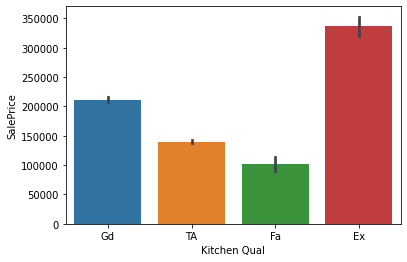

In [180]:
sns.barplot(df['Kitchen Qual'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Kitchen AbvGr', ylabel='SalePrice'>

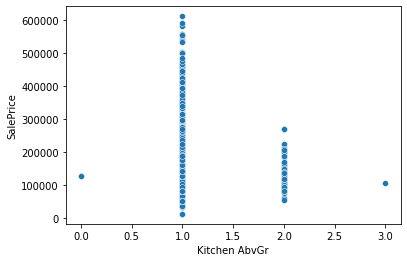

In [181]:
sns.scatterplot(df['Kitchen AbvGr'],df['SalePrice'])

### Yr Sold (dropped) low corr

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Yr Sold', ylabel='SalePrice'>

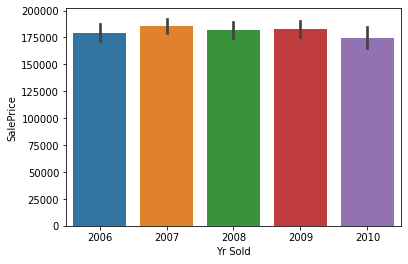

In [182]:
sns.barplot(df['Yr Sold'],df['SalePrice'])

#### Functional

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

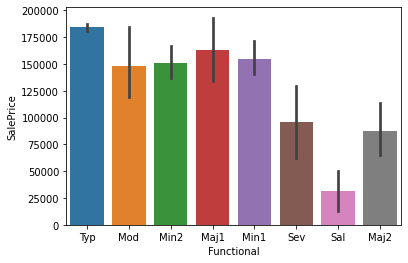

In [183]:
sns.barplot(df['Functional'],df['SalePrice'])

#### Garage Type

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Garage Type', ylabel='SalePrice'>

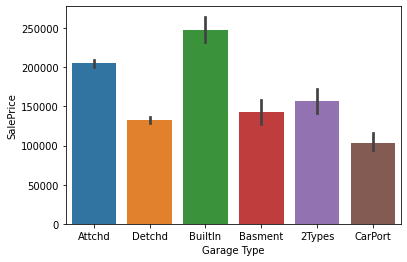

In [184]:
sns.barplot(df['Garage Type'],df['SalePrice'])

#### Garage Yr Blt, Year Built, Year Remod/Add

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

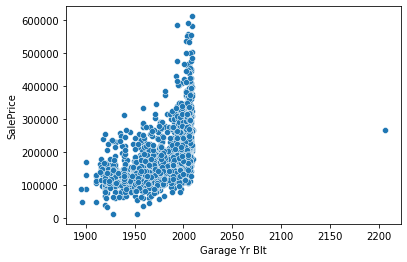

In [185]:
sns.scatterplot(df['Garage Yr Blt'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

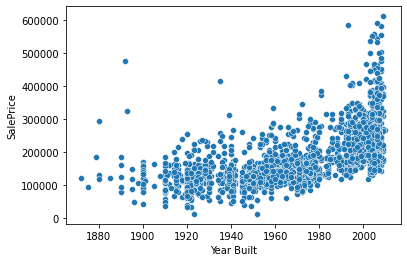

In [186]:
sns.scatterplot(df['Year Built'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

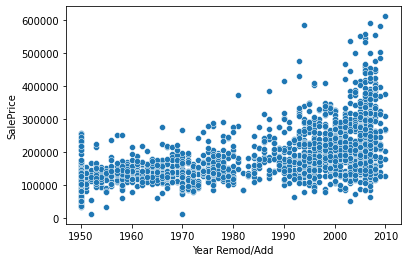

In [187]:
sns.scatterplot(df['Year Remod/Add'],df['SalePrice'])

#### Garage Finish, Garage Cars, Garage area, Garage qual, Garage cond???

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Garage Finish', ylabel='SalePrice'>

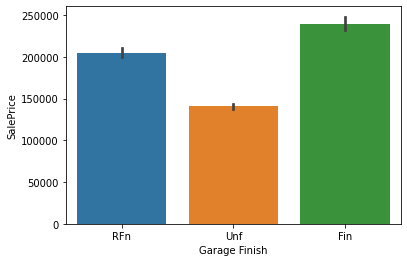

In [188]:
sns.barplot(df['Garage Finish'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

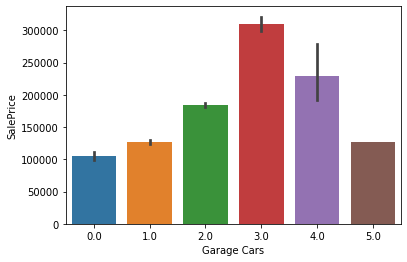

In [189]:
sns.barplot(df['Garage Cars'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Garage Qual', ylabel='SalePrice'>

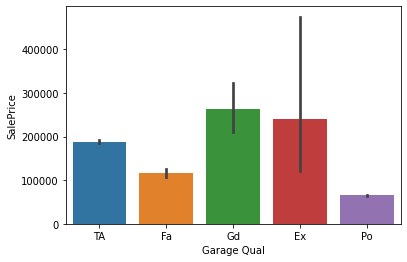

In [190]:
sns.barplot(df['Garage Qual'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

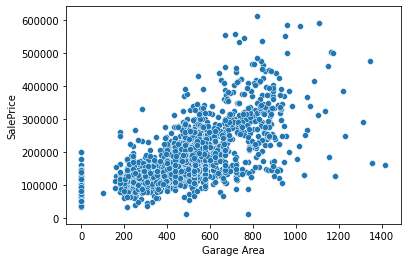

In [191]:
sns.scatterplot(df['Garage Area'],df['SalePrice'])

### Misc Val

<AxesSubplot:>

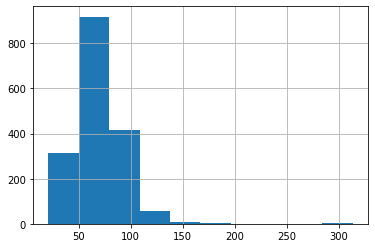

In [192]:
df['Lot Frontage'].hist()

In [193]:
['Low Qual Fin SF','Yr Sold','Misc Val','Pool Area']

['Low Qual Fin SF', 'Yr Sold', 'Misc Val', 'Pool Area']

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BsmtFin SF 1', ylabel='SalePrice'>

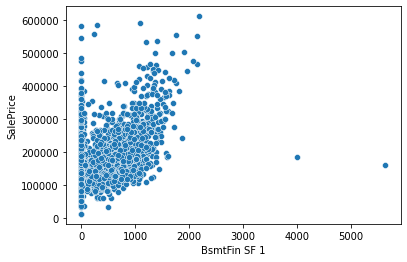

In [194]:
sns.scatterplot(df['BsmtFin SF 1'],df['SalePrice'])

<AxesSubplot:>

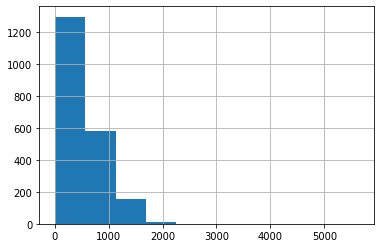

In [195]:
df['BsmtFin SF 1'].hist()

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Bsmt Unf SF', ylabel='SalePrice'>

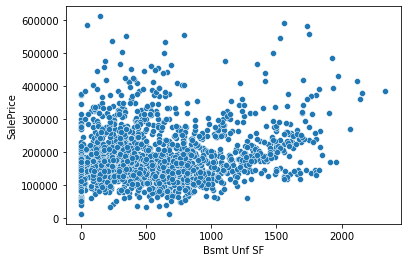

In [196]:
sns.scatterplot(df['Bsmt Unf SF'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

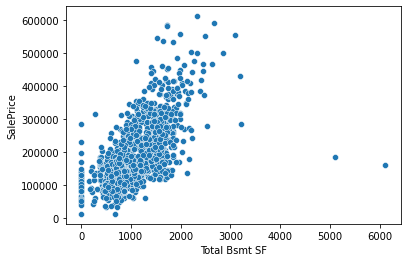

In [197]:
sns.scatterplot(df['Total Bsmt SF'],df['SalePrice'])

In [198]:
df['Bsmt Full Bath'].isna().sum()

2

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Bsmt Full Bath', ylabel='SalePrice'>

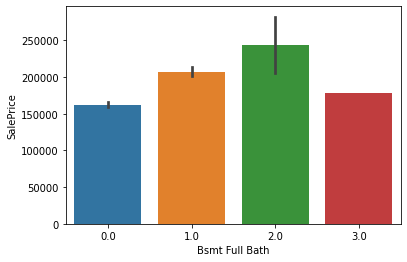

In [199]:
sns.barplot(df['Bsmt Full Bath'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Bsmt Half Bath', ylabel='SalePrice'>

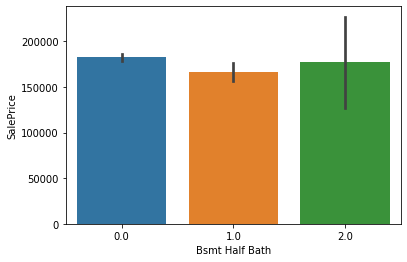

In [200]:
sns.barplot(df['Bsmt Half Bath'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

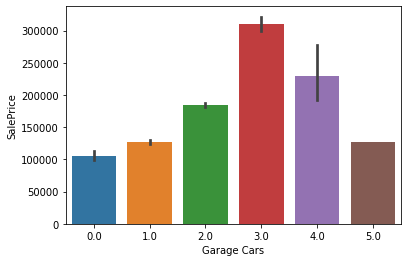

In [201]:
sns.barplot(df['Garage Cars'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

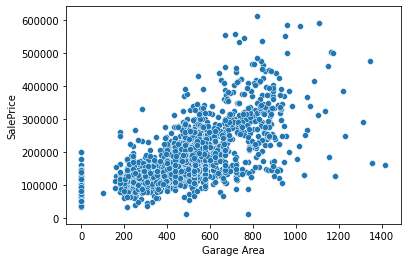

In [202]:
sns.scatterplot(df['Garage Area'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

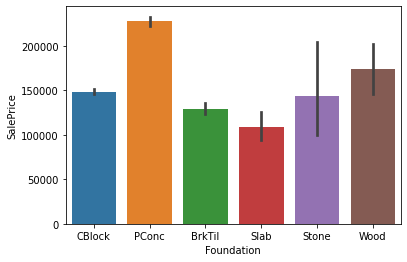

In [203]:
sns.barplot(df['Foundation'],df['SalePrice'])

In [204]:
df.groupby('Foundation').mean()['SalePrice']

Foundation
BrkTil    129050.190045
CBlock    148415.530707
PConc     227676.483801
Slab      108810.676471
Stone     143235.200000
Wood      173750.000000
Name: SalePrice, dtype: float64

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

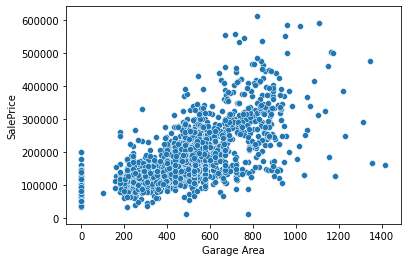

In [205]:
sns.scatterplot(df['Garage Area'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='House Style', ylabel='SalePrice'>

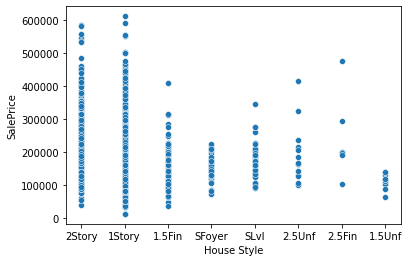

In [206]:
sns.scatterplot(df['House Style'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exter Qual', ylabel='SalePrice'>

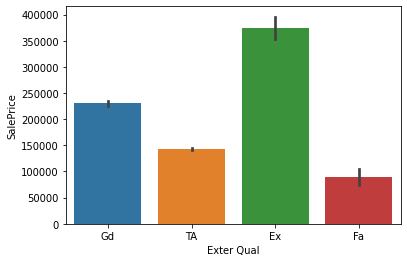

In [207]:
sns.barplot(df['Exter Qual'],df['SalePrice'])

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exter Cond', ylabel='SalePrice'>

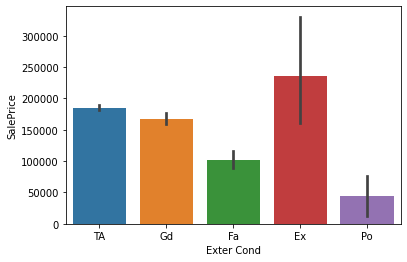

In [208]:
sns.barplot(df['Exter Cond'],df['SalePrice'])